In [30]:
import numpy as np 
import pandas as pd
from sklearn.datasets import make_classification
import random

In [31]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5, n_clusters_per_class=1)

In [32]:
df = pd.DataFrame(X,columns = ['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-0.457529,-0.650581,-0.165022,-0.518103,-1.009097,1
1,0.752665,-0.187614,-0.517671,0.999822,-2.878560,1
2,1.585555,-2.575000,0.106195,-0.196500,-1.806437,1
3,1.871260,-0.349319,-0.120132,2.266033,-1.988968,1
4,-2.059141,3.084295,1.311885,3.062584,0.976973,0


In [33]:
#function for row samplling 
def sample_rows(df,percent):
    return df.sample(int(percent*df.shape[0]),replace=True)

In [34]:
#function for feature sampling
def sample_features(df,percent):
    cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
    new_df = df[cols]
    new_df['target'] = df['target']
    return new_df

In [35]:
#funcation for combined sampling
def combined_sampling(df,row_percent,col_percent):
    new_df = sample_rows(df,row_percent)
    return sample_features(new_df,col_percent)

In [36]:
df1 = combined_sampling(df,0.5,0.5)

C:\Users\shiva\AppData\Local\Temp\ipykernel_19920\406334237.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [37]:
df2 = combined_sampling(df,0.5,0.5)

C:\Users\shiva\AppData\Local\Temp\ipykernel_19920\406334237.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [38]:
df3 = combined_sampling(df,0.5,0.5)

C:\Users\shiva\AppData\Local\Temp\ipykernel_19920\406334237.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [39]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col2', 'col1', 'target'], dtype='object')
Index(['col3', 'col2', 'target'], dtype='object')
Index(['col4', 'col2', 'target'], dtype='object')


In [16]:
df.columns

Index(['col1', 'col2', 'col3', 'col4', 'col5', 'target'], dtype='object')

In [40]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [41]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf3.fit(df1.iloc[:,0:2],df3.iloc[:,-1])
clf2.fit(df1.iloc[:,0:2],df2.iloc[:,-1])

DecisionTreeClassifier()

In [42]:
from sklearn.tree import plot_tree

[Text(0.5555555555555556, 0.9285714285714286, 'x[1] <= -0.406\ngini = 0.497\nsamples = 50\nvalue = [27, 23]'),
 Text(0.3333333333333333, 0.7857142857142857, 'x[0] <= -0.616\ngini = 0.08\nsamples = 24\nvalue = [23, 1]'),
 Text(0.4444444444444444, 0.8571428571428572, 'True  '),
 Text(0.2222222222222222, 0.6428571428571429, 'x[1] <= -0.684\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1111111111111111, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3333333333333333, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4444444444444444, 0.6428571428571429, 'gini = 0.0\nsamples = 22\nvalue = [22, 0]'),
 Text(0.7777777777777778, 0.7857142857142857, 'x[0] <= 1.571\ngini = 0.26\nsamples = 26\nvalue = [4, 22]'),
 Text(0.6666666666666667, 0.8571428571428572, '  False'),
 Text(0.6666666666666666, 0.6428571428571429, 'x[1] <= 0.94\ngini = 0.211\nsamples = 25\nvalue = [3, 22]'),
 Text(0.5555555555555556, 0.5, 'x[1] <= 0.393\ngini = 0.375\nsamples = 12\nvalue = [3, 9]'),
 Text(0.

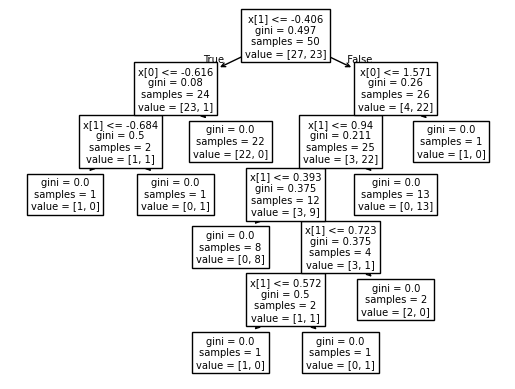

In [43]:
plot_tree(clf1)

[Text(0.6428571428571429, 0.9444444444444444, 'x[1] <= 1.02\ngini = 0.497\nsamples = 50\nvalue = [23, 27]'),
 Text(0.5, 0.8333333333333334, 'x[1] <= -1.775\ngini = 0.488\nsamples = 38\nvalue = [22, 16]'),
 Text(0.5714285714285714, 0.8888888888888888, 'True  '),
 Text(0.42857142857142855, 0.7222222222222222, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.5714285714285714, 0.7222222222222222, 'x[0] <= 1.352\ngini = 0.444\nsamples = 33\nvalue = [22, 11]'),
 Text(0.5, 0.6111111111111112, 'x[1] <= -0.152\ngini = 0.493\nsamples = 25\nvalue = [14.0, 11.0]'),
 Text(0.2857142857142857, 0.5, 'x[1] <= -1.303\ngini = 0.484\nsamples = 17\nvalue = [7, 10]'),
 Text(0.21428571428571427, 0.3888888888888889, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.35714285714285715, 0.3888888888888889, 'x[0] <= 0.316\ngini = 0.444\nsamples = 15\nvalue = [5, 10]'),
 Text(0.2857142857142857, 0.2777777777777778, 'x[1] <= -0.379\ngini = 0.494\nsamples = 9\nvalue = [5, 4]'),
 Text(0.14285714285714285, 0.1666

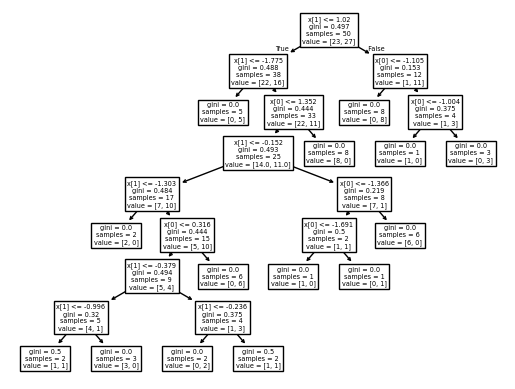

In [44]:
plot_tree(clf3)

[Text(0.5543478260869565, 0.9375, 'x[1] <= 1.203\ngini = 0.497\nsamples = 50\nvalue = [27, 23]'),
 Text(0.32608695652173914, 0.8125, 'x[0] <= -0.413\ngini = 0.48\nsamples = 40\nvalue = [24, 16]'),
 Text(0.44021739130434784, 0.875, 'True  '),
 Text(0.13043478260869565, 0.6875, 'x[0] <= -1.755\ngini = 0.26\nsamples = 13\nvalue = [11, 2]'),
 Text(0.08695652173913043, 0.5625, 'x[0] <= -1.848\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.043478260869565216, 0.4375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.13043478260869565, 0.4375, 'x[0] <= -1.78\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.08695652173913043, 0.3125, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.17391304347826086, 0.3125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.17391304347826086, 0.5625, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.5217391304347826, 0.6875, 'x[1] <= 0.076\ngini = 0.499\nsamples = 27\nvalue = [13, 14]'),
 Text(0.4782608695652174, 0.5625, 'x[0] <= 1.456\ngini

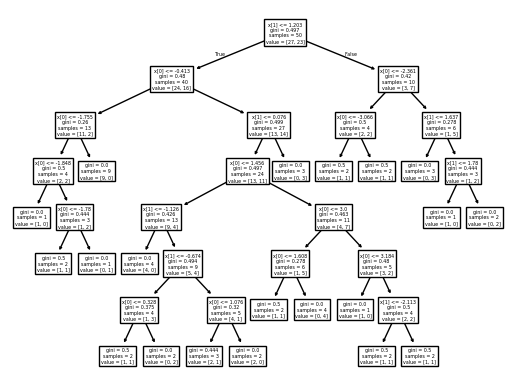

In [45]:
plot_tree(clf2)

In [46]:
clf1.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

F:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [47]:
clf2.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

F:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [48]:
clf3.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

F:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])